<a href="https://colab.research.google.com/github/shreyash26cho/cv_minipro/blob/main/fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fire detected in the image.


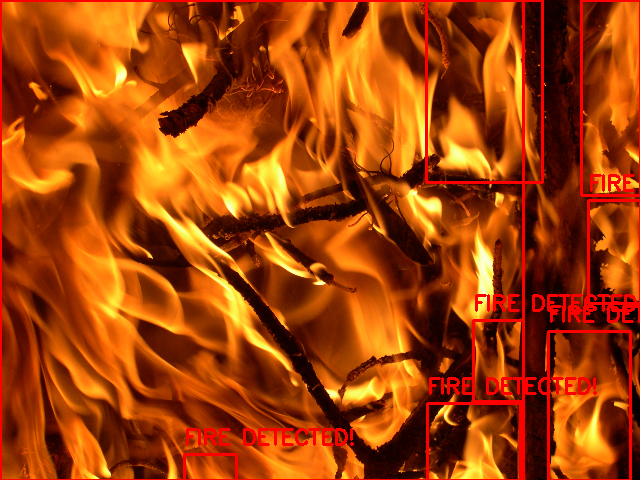

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 🔹 Step 1: Load image
img = cv2.imread("/content/FIRE_01.jpg")   # 👈 replace with your image path
img = cv2.resize(img, (640, 480))

# 🔹 Step 2: Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 🔹 Step 3: Define fire color range (orange/yellow)
lower_fire = np.array([10, 100, 100])
upper_fire = np.array([25, 255, 255])

# 🔹 Step 4: Create mask
mask_fire = cv2.inRange(hsv, lower_fire, upper_fire)

# 🔹 Step 5: Clean mask (remove noise)
mask_fire = cv2.morphologyEx(mask_fire, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8))
mask_fire = cv2.morphologyEx(mask_fire, cv2.MORPH_DILATE, np.ones((5, 5), np.uint8))

# 🔹 Step 6: Find fire contours
contours, _ = cv2.findContours(mask_fire, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

fire_detected = False
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 800:  # ignore small spots
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        cv2.putText(img, "FIRE DETECTED!", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        fire_detected = True

# 🔹 Step 7: Optional — detect smoke (grayish area)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 🔹 Step 8: Display output
if fire_detected:
    print("Fire detected in the image.")
else:
    print("No fire detected in the image.")

cv2_imshow(img)

Only fire detected in the image.


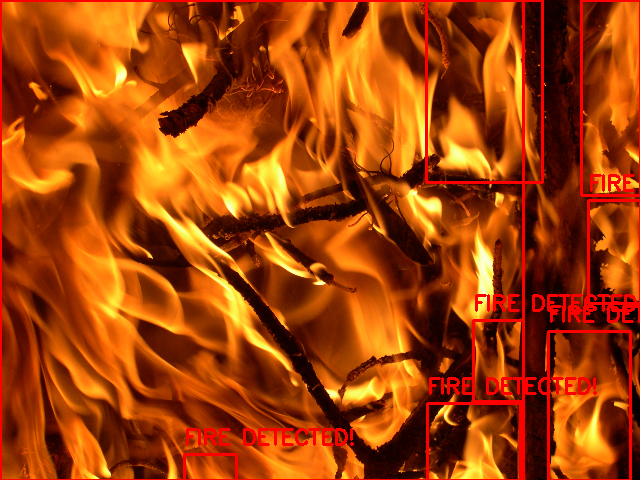

In [16]:
# Define smoke color range (grayish area)
lower_smoke = np.array([0, 0, 150])
upper_smoke = np.array([180, 50, 220])

# Create smoke mask
mask_smoke = cv2.inRange(hsv, lower_smoke, upper_smoke)

# Find smoke contours
contours_smoke, _ = cv2.findContours(mask_smoke, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes for smoke
smoke_detected = False
for cnt_smoke in contours_smoke:
    area_smoke = cv2.contourArea(cnt_smoke)
    if area_smoke > 500:  # Filter small smoke spots
        x_smoke, y_smoke, w_smoke, h_smoke = cv2.boundingRect(cnt_smoke)
        cv2.rectangle(img, (x_smoke, y_smoke), (x_smoke+w_smoke, y_smoke+h_smoke), (0, 255, 0), 2) # Green bounding box
        cv2.putText(img, "SMOKE DETECTED!", (x_smoke, y_smoke-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2) # Green text
        smoke_detected = True

# Update output message
if fire_detected and smoke_detected:
    print("Fire and smoke detected in the image.")
elif fire_detected:
    print("Only fire detected in the image.")
elif smoke_detected:
    print("Only smoke detected in the image.")
else:
    print("Neither fire nor smoke detected in the image.")

cv2_imshow(img)